### Importing Relevant Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')



### Removing Surplus Data

In [3]:
df_comp['market_value']=df_comp.spx

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [5]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size=len(df))

In [6]:
df['wn'] = wn

C:\Users\sabin\AppData\Local\Temp/ipykernel_4648/672873062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [7]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1095.937666
std,292.559287,292.544345
min,438.920000,138.265374
25%,914.620000,896.577262
50%,1144.650000,1095.300899
75%,1316.280729,1290.423460
max,1570.252238,2184.629359


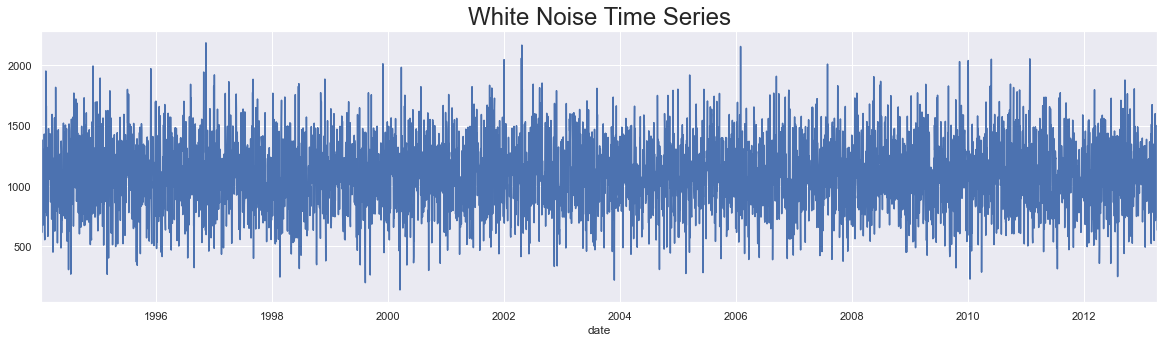

In [10]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time Series", size=24)
plt.show()

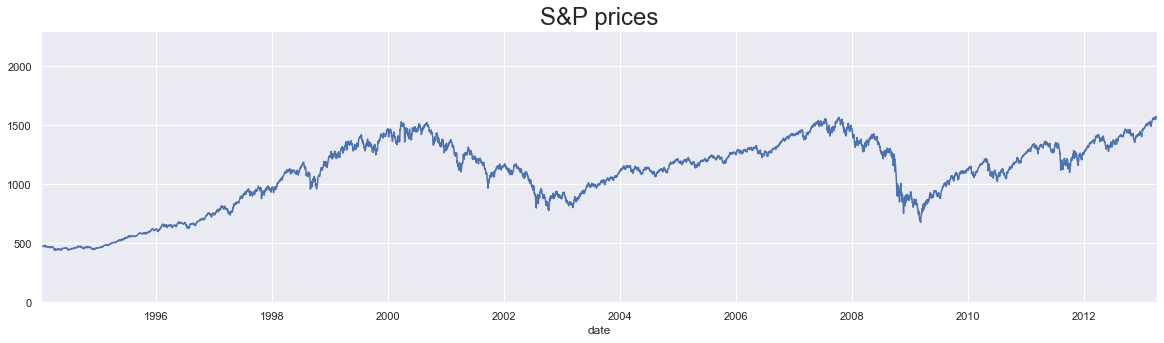

In [12]:
df.market_value.plot(figsize = (20,5))
plt.title("S&P prices", size=24)
plt.ylim(0,2300)
plt.show()

### Random Walk

In [16]:
rw = pd.read_csv("RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index("date", inplace=True)
rw = rw.asfreq("b")

In [17]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [18]:
df["rw"] = rw.price

C:\Users\sabin\AppData\Local\Temp/ipykernel_4648/3989722725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rw"] = rw.price


In [19]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,233.435143,1122.139662
1994-01-10,475.27,1012.327400,1080.347860
1994-01-11,474.13,613.036964,1082.095245
1994-01-12,474.17,1208.887809,1083.639265
1994-01-13,472.47,1379.962643,1067.146255


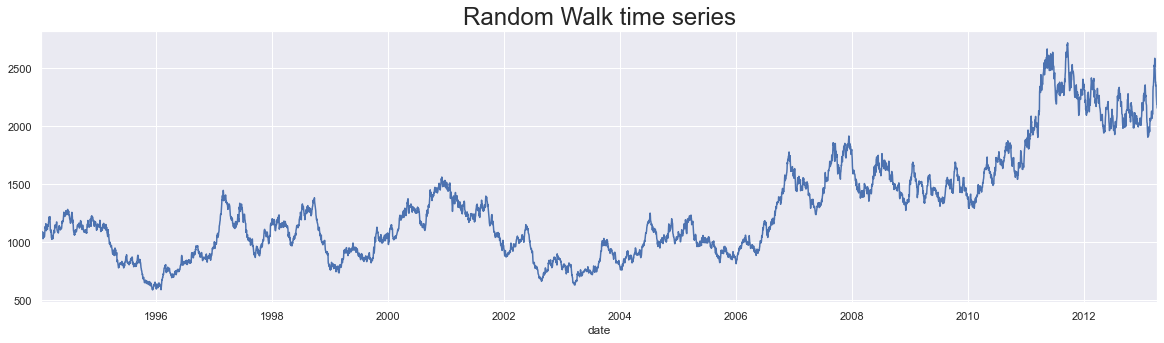

In [20]:
df.rw.plot(figsize=(20,5))
plt.title("Random Walk", size=24)
plt.show()

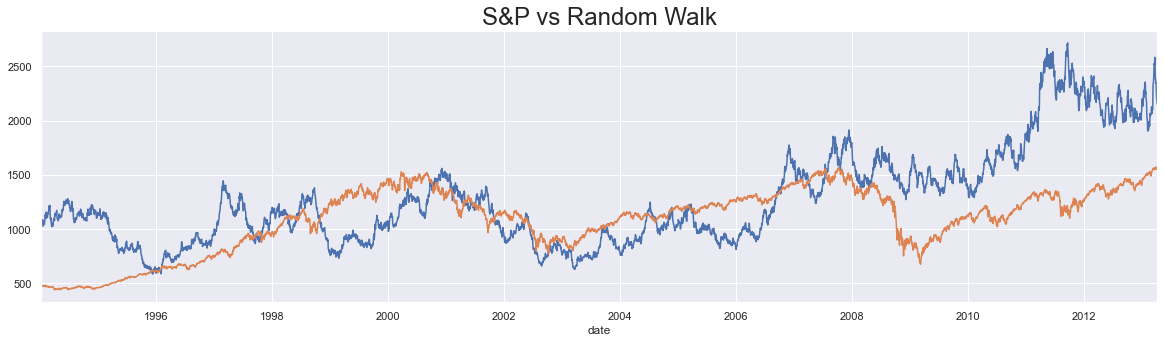

In [21]:
df.rw.plot(figsize=(20,5))
df.market_value.plot(figsize=(20,5))
plt.title("S&P vs Random Walk", size=24)
plt.show()

### Stationarity

In [22]:
sts.adfuller(df.market_value)

(-1.7369847452352452,
 0.41216456967706144,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [23]:
sts.adfuller(df.wn)

(-41.190412770999636,
 0.0,
 2,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 70792.12741315342)

In [24]:
sts.adfuller(df.rw)

(-1.3286073927689726,
 0.6159849181617382,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonality

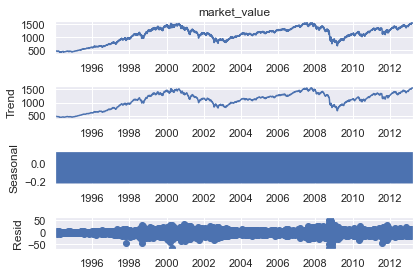

In [26]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
plt.show()

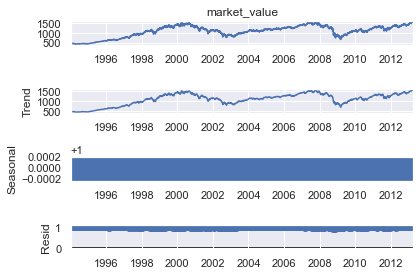

In [27]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

### ACF

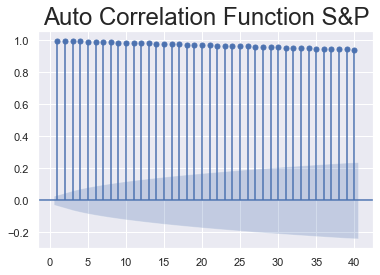

In [28]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("Auto Correlation Function S&P", size = 24)
plt.show()

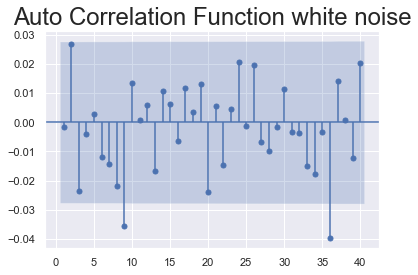

In [29]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("Auto Correlation Function white noise", size = 24)
plt.show()

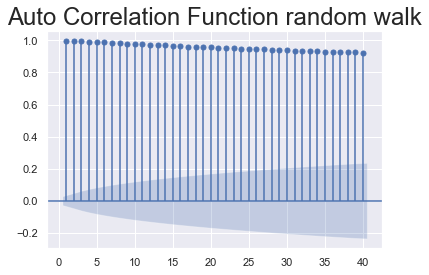

In [31]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("Auto Correlation Function random walk", size = 24)
plt.show()

### PACF

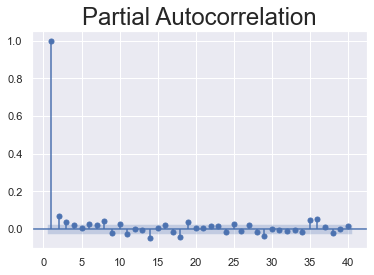

In [34]:
sgt.plot_pacf(df.market_value, lags=40, zero=False, method=('ols'))
plt.title("Partial Autocorrelation", size=24)
plt.show()

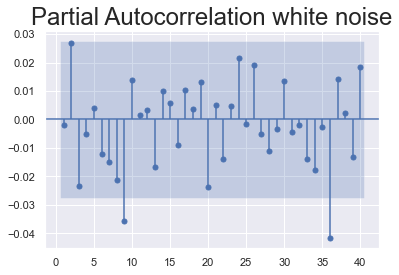

In [35]:
sgt.plot_pacf(df.wn, lags=40, zero=False, method=('ols'))
plt.title("Partial Autocorrelation white noise", size=24)
plt.show()

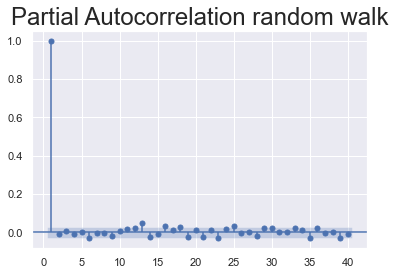

In [36]:
sgt.plot_pacf(df.rw, lags=40, zero=False, method=('ols'))
plt.title("Partial Autocorrelation random walk", size=24)
plt.show()